# American Sign Language real-time detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 62.2 MB/s eta 0:00:00


In [14]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [4]:
!kaggle datasets download -d kapillondhe/american-sign-language

!unzip -q american-sign-language.zip -d asl_dataset

Dataset URL: https://www.kaggle.com/datasets/kapillondhe/american-sign-language
License(s): GPL-2.0
100% 4.63G/4.64G [04:13<00:00, 22.5MB/s]
100% 4.64G/4.64G [04:13<00:00, 19.6MB/s]


In [5]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

In [7]:
import os
import random

def remove_images(data_dir, images_to_remove=2500):

    for class_folder in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_folder)

        if not os.path.isdir(class_path):
            continue

        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        if len(image_files) > images_to_remove:

            images_to_delete = random.sample(image_files, images_to_remove)

            for image in images_to_delete:
                os.remove(os.path.join(class_path, image))

            print(f"Removed {images_to_remove} images from class '{class_folder}'.")
        else:
            print(f"Class '{class_folder}' has fewer than {images_to_remove} images. Skipping.")

data_dir = '/content/asl_dataset/ASL_Dataset/Train'
remove_images(data_dir, images_to_remove=2500)

Removed 2500 images from class 'A'.
Removed 2500 images from class 'B'.
Removed 2500 images from class 'C'.
Removed 2500 images from class 'D'.
Removed 2500 images from class 'E'.
Removed 2500 images from class 'F'.
Removed 2500 images from class 'G'.
Removed 2500 images from class 'H'.
Removed 2500 images from class 'I'.
Removed 2500 images from class 'J'.
Removed 2500 images from class 'K'.
Removed 2500 images from class 'L'.
Removed 2500 images from class 'M'.
Removed 2500 images from class 'N'.
Removed 2500 images from class 'Nothing'.
Removed 2500 images from class 'O'.
Removed 2500 images from class 'P'.
Removed 2500 images from class 'Q'.
Removed 2500 images from class 'R'.
Removed 2500 images from class 'S'.
Removed 2500 images from class 'Space'.
Removed 2500 images from class 'T'.
Removed 2500 images from class 'U'.
Removed 2500 images from class 'V'.
Removed 2500 images from class 'W'.
Removed 2500 images from class 'X'.
Removed 2500 images from class 'Y'.
Removed 2500 image

In [8]:
import os
import cv2
import pickle
import mediapipe as mp

# Mediapipe Hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

data_dir = '/content/asl_dataset/ASL_Dataset/Train'
data = []
labels = []

# Process each folder and image in the dataset
for label_folder in sorted(os.listdir(data_dir)):
    label_path = os.path.join(data_dir, label_folder)

    if not os.path.isdir(label_path):
        continue

    for image_file in os.listdir(label_path):
        image_path = os.path.join(label_path, image_file)

        # Read the image
        img = cv2.imread(image_path)
        if img is None:
            continue

        # Convert the image to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Process the image to extract hand landmarks
        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            data_aux = []
            for hand_landmarks in results.multi_hand_landmarks:
                for landmark in hand_landmarks.landmark:
                    data_aux.append(landmark.x)
                    data_aux.append(landmark.y)
            data.append(data_aux)
            labels.append(label_folder)
            print(f"Processed image: {image_file}")
        else:
            print(f"No hand landmarks found in image: {image_file}")

with open('data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)

print("Data successfully saved to 'data.pickle'")

Streaming output truncated to the last 5000 lines.
Processed image: 690.jpg
Processed image: Y720.jpg
Processed image: Y771.jpg
Processed image: 2936.jpg
Processed image: Y2824.jpg
Processed image: 2566.jpg
Processed image: Y291.jpg
Processed image: 755.jpg
Processed image: Y2797.jpg
Processed image: Y939.jpg
Processed image: Y2738.jpg
Processed image: Y2439.jpg
Processed image: Y1622.jpg
Processed image: Y434.jpg
Processed image: 390.jpg
Processed image: 1907.jpg
Processed image: 2281.jpg
Processed image: 1784.jpg
Processed image: 2877.jpg
Processed image: Y2361.jpg
Processed image: Y625.jpg
Processed image: 61.jpg
Processed image: Y775.jpg
Processed image: 2336.jpg
Processed image: 1431.jpg
Processed image: 2130.jpg
Processed image: 2665.jpg
Processed image: Y1857.jpg
Processed image: Y145.jpg
Processed image: Y1485.jpg
Processed image: 2461.jpg
No hand landmarks found in image: 2219.jpg
Processed image: Y792.jpg
Processed image: 1715.jpg
Processed image: Y448.jpg
Processed image: 27

<ipython-input-10-7befff890fb0>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


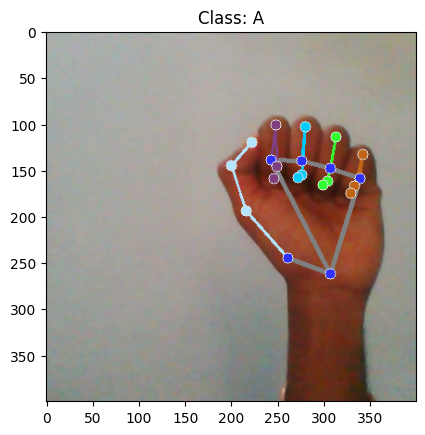

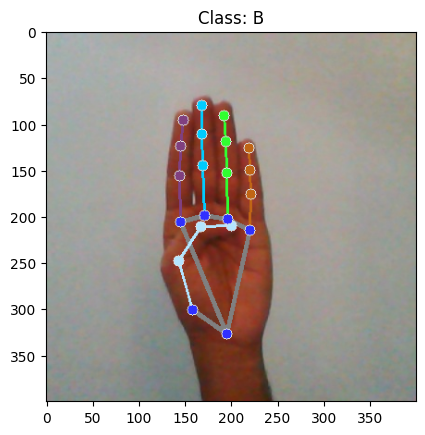

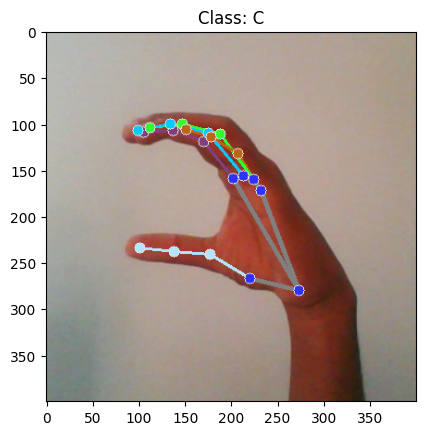

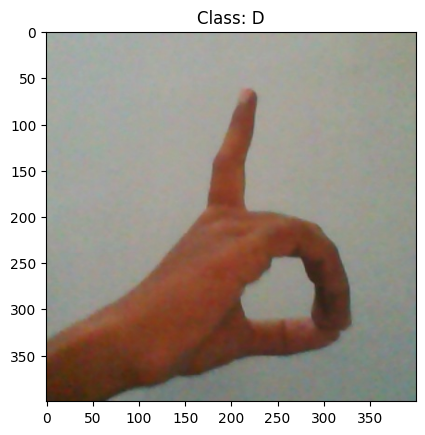

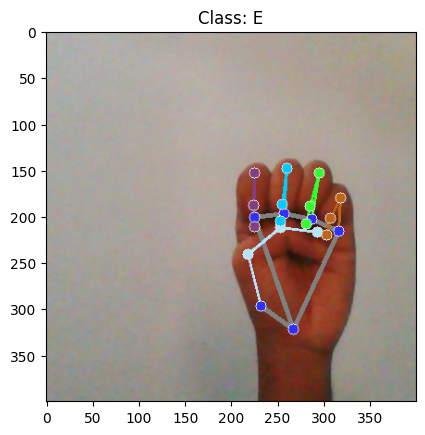

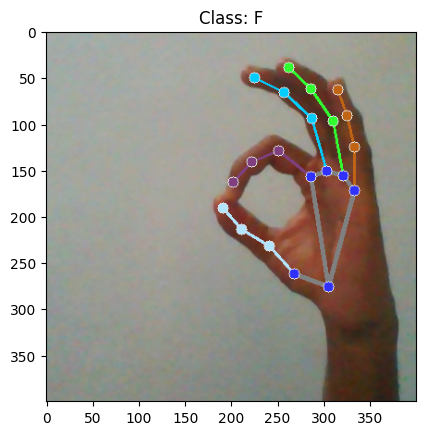

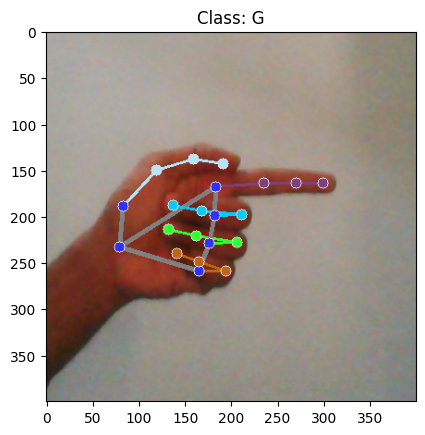

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Mediapipe modules
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

data_dir = 'asl_dataset/ASL_Dataset/Train'

for label in sorted(os.listdir(data_dir)):
    label_path = os.path.join(data_dir, label)

    if not os.path.isdir(label_path):
        continue

    sample_images = os.listdir(label_path)
    if len(sample_images) == 0:
        print(f"No images found in class '{label}'. Skipping...")
        continue

    sample_image_path = os.path.join(label_path, sample_images[0])
    img = cv2.imread(sample_image_path)

    if img is None:
        print(f"Failed to read image from {sample_image_path}. Skipping...")
        continue

    # Convert to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Process the image and draw landmarks
    results = hands.process(img_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                img_rgb,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )

    plt.figure()
    plt.title(f"Class: {label}")
    plt.imshow(img_rgb)

plt.show()


# Training

In [11]:
# split data
X_train, X_test, y_train, y_test = train_test_split(np.array(data), labels, test_size=0.15, random_state=22, shuffle=True)

# model
model = RandomForestClassifier(random_state=22)
model.fit(X_train,y_train)

# predict
pred=model.predict(X_test)

# accruracy
accuracy_score(y_test,pred)

0.9997212155004181

In [15]:
# cross-validation
mean = np.mean(cross_val_score(model,X_train,y_train,cv=5))
print(mean)

0.9996719967199672


In [13]:
# save model
f = open('asl_detection_model.p', 'wb')
pickle.dump({'model':model},f)
f.close()